## Visualizing the trained filters

In [1]:
# some startup! 
import numpy as np
import matplotlib
# This is needed to save images 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
import torch

In [2]:
# load the model saved by train.py
# This will be an instance of models.softmax.Softmax.
# NOTE: You may need to change this file name.
twolayer_model = torch.load('twolayernn.pt')

torch.Size([300, 3072])
figure saved


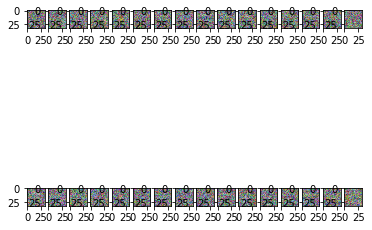

In [8]:
# collect all the weights
w1,b1,w2,b2 = [param.data for param in twolayer_model.parameters()]
print(w1.shape)
w = w1.view(300, 3, 32, 32) #(N, C, H, W)
w = w.numpy().transpose(0,2,3,1) #(N, H, W, C)
# obtain min,max to normalize
w_min, w_max = np.min(w), np.max(w)
# classes
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# init figure 
fig = plt.figure(figsize=(6,6))
for i in range(32):
    wimg = 255.0*(w[i].squeeze() - w_min) / (w_max - w_min)
    # subplot is (2,5) as ten filters are to be visualized
    fig.add_subplot(2,16,i+1).imshow(wimg.astype('uint8'))
# save fig! 
#fig.show()
fig.savefig('twolayernn_gridfilt.png')
print('figure saved')

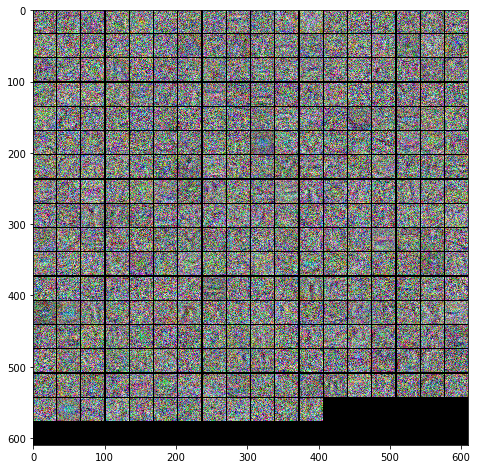

figure saved as a grid!


In [9]:
# vis_utils.py has helper code to view multiple filters in single image. Use this to visuzlize 
# neural network adn convnets. 
# import vis_utils
from vis_utils import visualize_grid
# saving the weights is now as simple as:
grid = visualize_grid(w, padding = 2).astype('uint8')
plt.imshow(grid)
plt.show()
plt.imsave('twolayernn_gridfilt.png',grid)
# padding is the space between images. Make sure that w is of shape: (N,H,W,C)
print('figure saved as a grid!')